In [54]:
#import important liabrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)

In [55]:
data=pd.read_csv(r"E:\used_cars_price.csv")

In [56]:
data

company         model  year_car    km_car fuel_type  \
0            ['Maruti']      ['Ciaz']      2016  1,36,776    Diesel   
1            ['Maruti']      ['Ciaz']      2015    97,767    Petrol   
2            ['Maruti']     ['Swift']      2014  1,13,711    Diesel   
3              ['Ford']  ['Ecosport']      2016    85,902    Diesel   
4            ['Maruti']      ['Ciaz']      2018    43,853    Petrol   
...                 ...           ...       ...       ...       ...   
5815        ['Hyundai']     ['Creta']      2017    39,000    Petrol   
5816         ['Maruti']    ['Vitara']      2019    19,000    Diesel   
5817           ['Ford']  ['Ecosport']      2016    24,000    Petrol   
5818         ['Toyota']     ['Etios']      2011    54,213    Petrol   
5819  ['Mercedes-Benz']   ['E-Class']      2010    38,000    Petrol   

           spec   location  price_car_inlakh  
0        Manual  New Delhi              5.21  
1     Automatic  New Delhi              5.58  
2        Manual  New Delhi              4.64  
3        Manual  New Delhi              5.86  
4        Manual  New Delhi              7.59  
...         ...        ...               ...  
5815     Manual     Mumbai              8.95  
5816  Automatic     Mumbai             10.50  
5817  Automatic     Mumbai              7.16  
5818     Manual     Mumbai              3.25  
5819  Automatic     Mumbai             11.99  

[5820 rows x 8 columns]

In [57]:
df=data.copy()

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           5820 non-null   object 
 1   model             5820 non-null   object 
 2   year_car          5820 non-null   int64  
 3   km_car            5820 non-null   object 
 4   fuel_type         5820 non-null   object 
 5   spec              5820 non-null   object 
 6   location          5820 non-null   object 
 7   price_car_inlakh  5820 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 363.9+ KB


In [59]:
data['km_car']=data['km_car'].str.replace(',','')

In [60]:
data['price_car_inlakh']=data['price_car_inlakh'].astype(float)

In [61]:
data['km_car']=data['km_car'].astype(int)

In [62]:
data['fuel_type'].unique()

array(['Diesel', 'Petrol', 'CNG', 'LPG', 'El'], dtype=object)

In [63]:
data['fuel_type']=data['fuel_type'].replace({'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'El':4})

In [64]:
data['spec'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [65]:
data['spec']=data['spec'].replace({'Manual':0,'Automatic':1})

In [66]:
data['location'].unique()

array(['New Delhi', 'Bangalore', 'Mumbai'], dtype=object)

In [67]:
data['location']=data['location'].replace({'New Delhi':0,'Bangalore':1,'Mumbai':2})

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           5820 non-null   object 
 1   model             5820 non-null   object 
 2   year_car          5820 non-null   int64  
 3   km_car            5820 non-null   int32  
 4   fuel_type         5820 non-null   int64  
 5   spec              5820 non-null   int64  
 6   location          5820 non-null   int64  
 7   price_car_inlakh  5820 non-null   float64
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 341.1+ KB


In [69]:
data.shape

(5820, 8)

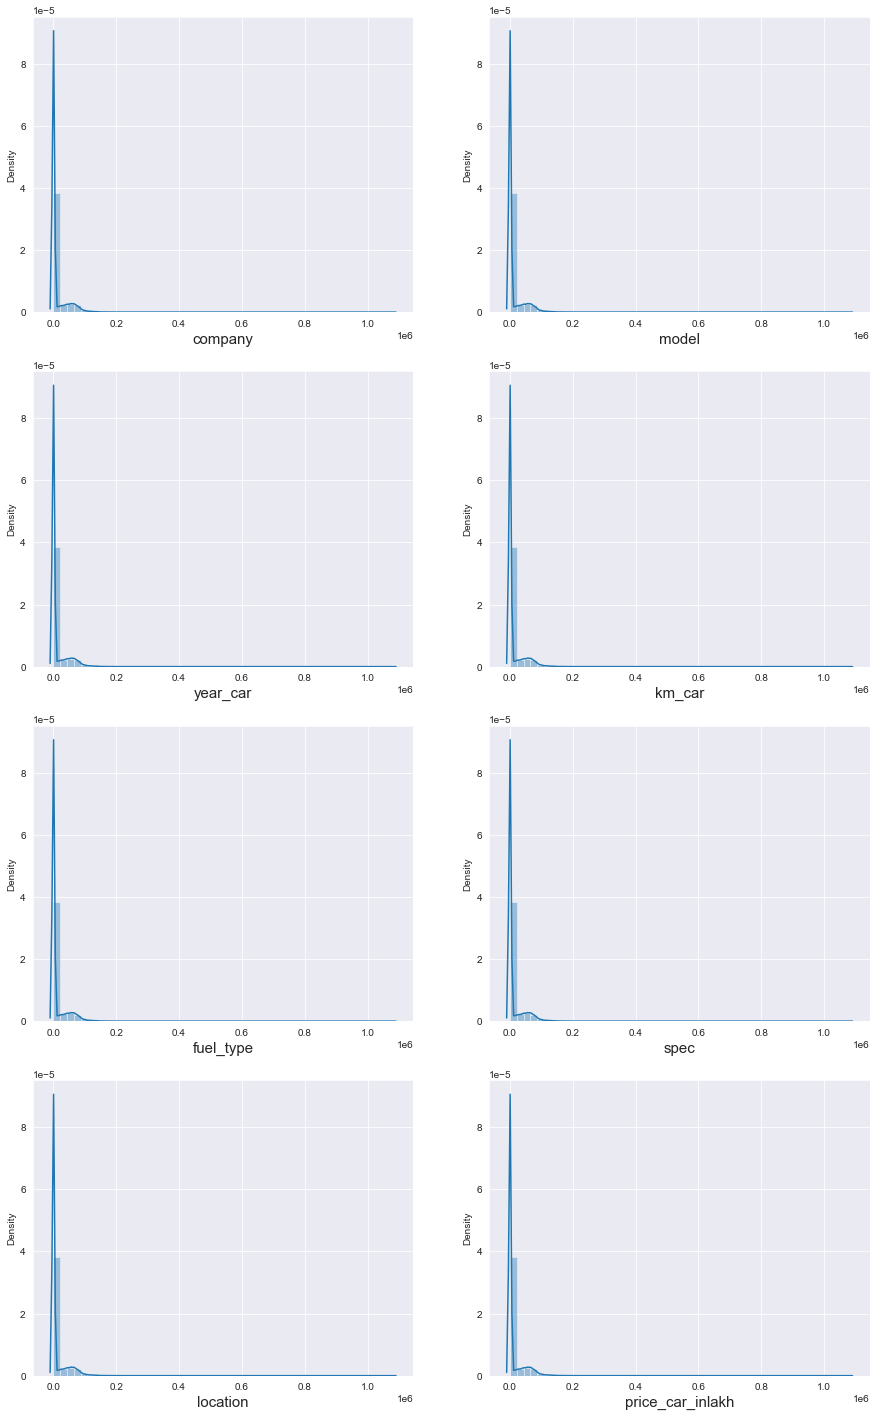

In [70]:
plt.figure(figsize=(15,25))
graph=1
for column in data:
    if graph<=8:
        ax=plt.subplot(4,2,graph)
        sns.distplot(data.iloc[:,3:])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [71]:
data.skew()

year_car           -0.471437
km_car              8.948667
fuel_type           0.530385
spec                0.809033
location            0.551649
price_car_inlakh    3.521796
dtype: float64

In [74]:
plt.figure(figsize=(32,16))
sns.countplot('company',hue='fuel_type',data=data)

<AxesSubplot:xlabel='company', ylabel='count'>

<AxesSubplot:xlabel='location', ylabel='count'>

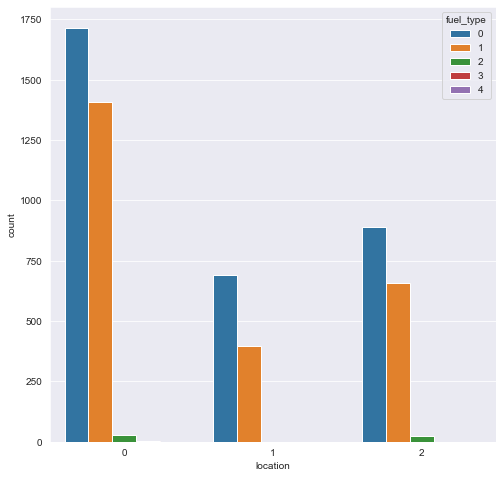

In [75]:
plt.figure(figsize=(8,8))
sns.countplot('location',hue='fuel_type',data=data)

In [76]:
plt.figure(figsize=(16,8))
sns.countplot('year_car',hue='fuel_type',data=data)

<AxesSubplot:xlabel='year_car', ylabel='count'>

<AxesSubplot:xlabel='spec', ylabel='count'>

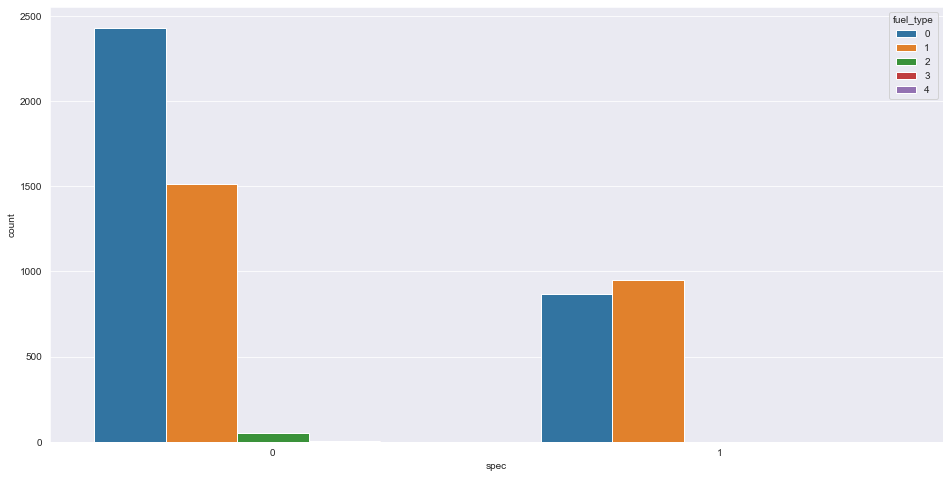

In [77]:
plt.figure(figsize=(16,8))
sns.countplot('spec',hue='fuel_type',data=data)

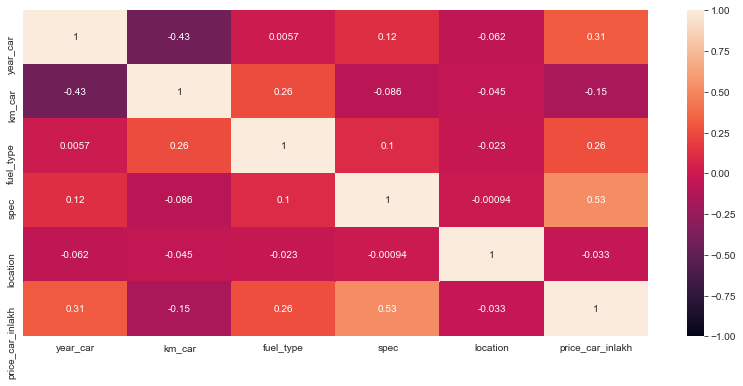

In [78]:
#coorelation matrix
plt.figure(figsize=(14,6))
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

In [79]:
# scaling of data
from sklearn.preprocessing import StandardScaler

In [80]:
scaler=StandardScaler()

In [81]:
df_dummy=pd.get_dummies(data,columns=['company','model'],drop_first=True)

In [82]:
df_dummy

year_car  km_car  fuel_type  spec  location  price_car_inlakh  \
0         2016  136776          1     0         0              5.21   
1         2015   97767          0     1         0              5.58   
2         2014  113711          1     0         0              4.64   
3         2016   85902          1     0         0              5.86   
4         2018   43853          0     0         0              7.59   
...        ...     ...        ...   ...       ...               ...   
5815      2017   39000          0     0         2              8.95   
5816      2019   19000          1     1         2             10.50   
5817      2016   24000          0     1         2              7.16   
5818      2011   54213          0     0         2              3.25   
5819      2010   38000          0     1         2             11.99   

      company_['Aston']  company_['Audi']  company_['BMW']  \
0                     0                 0                0   
1                     0                 0                0   
2                     0                 0                0   
3                     0                 0                0   
4                     0                 0                0   
...                 ...               ...              ...   
5815                  0                 0                0   
5816                  0                 0                0   
5817                  0                 0                0   
5818                  0                 0                0   
5819                  0                 0                0   

      company_['Bentley']  company_['Chevrolet']  company_['Datsun']  \
0                       0                      0                   0   
1                       0                      0                   0   
2                       0                      0                   0   
3                       0                      0                   0   
4                       0                      0                   0   
...                   ...                    ...                 ...   
5815                    0                      0                   0   
5816                    0                      0                   0   
5817                    0                      0                   0   
5818                    0                      0                   0   
5819                    0                      0                   0   

      company_['Fiat']  company_['Ford']  company_['Honda']  \
0                    0                 0                  0   
1                    0                 0                  0   
2                    0                 0                  0   
3                    0                 1                  0   
4                    0                 0                  0   
...                ...               ...                ...   
5815                 0                 0                  0   
5816                 0                 0                  0   
5817                 0                 1                  0   
5818                 0                 0                  0   
5819                 0                 0                  0   

      company_['Hyundai']  company_['Isuzu']  company_['Jaguar']  \
0                       0                  0                   0   
1                       0                  0                   0   
2                       0                  0                   0   
3                       0                  0                   0   
4                       0                  0                   0   
...                   ...                ...                 ...   
5815                    1                  0                   0   
5816                    0                  0                   0   
5817                    0                  0                   0   
5818                    0                  0                   0   
5819                    0             

In [83]:
data1=pd.concat([data,df_dummy],axis=1)

In [84]:
data1

company         model  year_car  km_car  fuel_type  spec  \
0            ['Maruti']      ['Ciaz']      2016  136776          1     0   
1            ['Maruti']      ['Ciaz']      2015   97767          0     1   
2            ['Maruti']     ['Swift']      2014  113711          1     0   
3              ['Ford']  ['Ecosport']      2016   85902          1     0   
4            ['Maruti']      ['Ciaz']      2018   43853          0     0   
...                 ...           ...       ...     ...        ...   ...   
5815        ['Hyundai']     ['Creta']      2017   39000          0     0   
5816         ['Maruti']    ['Vitara']      2019   19000          1     1   
5817           ['Ford']  ['Ecosport']      2016   24000          0     1   
5818         ['Toyota']     ['Etios']      2011   54213          0     0   
5819  ['Mercedes-Benz']   ['E-Class']      2010   38000          0     1   

      location  price_car_inlakh  year_car  km_car  fuel_type  spec  location  \
0            0              5.21      2016  136776          1     0         0   
1            0              5.58      2015   97767          0     1         0   
2            0              4.64      2014  113711          1     0         0   
3            0              5.86      2016   85902          1     0         0   
4            0              7.59      2018   43853          0     0         0   
...        ...               ...       ...     ...        ...   ...       ...   
5815         2              8.95      2017   39000          0     0         2   
5816         2             10.50      2019   19000          1     1         2   
5817         2              7.16      2016   24000          0     1         2   
5818         2              3.25      2011   54213          0     0         2   
5819         2             11.99      2010   38000          0     1         2   

      price_car_inlakh  company_['Aston']  company_['Audi']  company_['BMW']  \
0                 5.21                  0                 0                0   
1                 5.58                  0                 0                0   
2                 4.64                  0                 0                0   
3                 5.86                  0                 0                0   
4                 7.59                  0                 0                0   
...                ...                ...               ...              ...   
5815              8.95                  0                 0                0   
5816             10.50                  0                 0                0   
5817              7.16                  0                 0                0   
5818              3.25                  0                 0                0   
5819             11.99                  0                 0                0   

      company_['Bentley']  company_['Chevrolet']  company_['Datsun']  \
0                       0                      0                   0   
1                       0                      0                   0   
2                       0                      0                   0   
3                       0                      0                   0   
4                       0                      0                   0   
...                   ...                    ...                 ...   
5815                    0                      0                   0   
5816                    0                      0                   0   
5817                    0                      0                   0   
5818                    0                      0                   0   
5819                    0                      0                   0   

      company_['Fiat']  company_['Ford']  company_['Honda']  \
0                    0                 0                  0   
1                    0                 0                  0   
2                    0                 0                  0   
3                    0                 1            

In [85]:
final_data=data1.drop(['company','model'],axis=1)
final_data

year_car  km_car  fuel_type  spec  location  price_car_inlakh  year_car  \
0         2016  136776          1     0         0              5.21      2016   
1         2015   97767          0     1         0              5.58      2015   
2         2014  113711          1     0         0              4.64      2014   
3         2016   85902          1     0         0              5.86      2016   
4         2018   43853          0     0         0              7.59      2018   
...        ...     ...        ...   ...       ...               ...       ...   
5815      2017   39000          0     0         2              8.95      2017   
5816      2019   19000          1     1         2             10.50      2019   
5817      2016   24000          0     1         2              7.16      2016   
5818      2011   54213          0     0         2              3.25      2011   
5819      2010   38000          0     1         2             11.99      2010   

      km_car  fuel_type  spec  location  price_car_inlakh  company_['Aston']  \
0     136776          1     0         0              5.21                  0   
1      97767          0     1         0              5.58                  0   
2     113711          1     0         0              4.64                  0   
3      85902          1     0         0              5.86                  0   
4      43853          0     0         0              7.59                  0   
...      ...        ...   ...       ...               ...                ...   
5815   39000          0     0         2              8.95                  0   
5816   19000          1     1         2             10.50                  0   
5817   24000          0     1         2              7.16                  0   
5818   54213          0     0         2              3.25                  0   
5819   38000          0     1         2             11.99                  0   

      company_['Audi']  company_['BMW']  company_['Bentley']  \
0                    0                0                    0   
1                    0                0                    0   
2                    0                0                    0   
3                    0                0                    0   
4                    0                0                    0   
...                ...              ...                  ...   
5815                 0                0                    0   
5816                 0                0                    0   
5817                 0                0                    0   
5818                 0                0                    0   
5819                 0                0                    0   

      company_['Chevrolet']  company_['Datsun']  company_['Fiat']  \
0                         0                   0                 0   
1                         0                   0                 0   
2                         0                   0                 0   
3                         0                   0                 0   
4                         0                   0                 0   
...                     ...                 ...               ...   
5815                      0                   0                 0   
5816                      0                   0                 0   
5817                      0                   0                 0   
5818                      0                   0                 0   
5819                      0                   0                 0   

      company_['Ford']  company_['Honda']  company_['Hyundai']  \
0                    0                  0                    0   
1                    0                  0                    0   
2                    0                  0                    0   
3                    1                  0                    0   
4                    0                  0                    0   
...                ...                ...                  ...   
5815        

In [86]:
x=final_data.drop(columns='price_car_inlakh')
y=final_data['price_car_inlakh']

In [87]:
x=scaler.fit_transform(x)

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=50)

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [91]:
lr=LinearRegression()

In [92]:
lr.fit(x_train,y_train)

LinearRegression()

In [93]:
lr.score(x_train,y_train)

0.836794766276865

In [94]:
lr.score(x_test,y_test)

-7.709037537431391e+26

In [95]:
lr_pred=lr.predict(x_test)

In [96]:
mean_absolute_error(y_test,lr_pred)

26846549735708.08

In [97]:
mean_squared_error(y_test,lr_pred)

8.771043521153491e+28

In [98]:
r2_score(y_test,lr_pred)

-7.709037537431391e+26

In [99]:
from sklearn.model_selection import cross_val_score,GridSearchCV

In [100]:
lin_score=cross_val_score(lr,x,y,cv=5,scoring='neg_mean_absolute_error')
lr_score_n=-lin_score
np.mean(lr_score_n)

26948139583915.562

In [101]:
lin_score=cross_val_score(lr,x,y,cv=5,scoring='neg_mean_squared_error')
lr_score_n=-lin_score
np.mean(lr_score_n)

1.1406457446957885e+29

In [102]:
lin_score=cross_val_score(lr,x,y,cv=5,scoring='r2')
lr_score_n=-lin_score
np.mean(lr_score_n)

4.2132113707674356e+27

In [153]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [154]:
lasso_reg.score(x_train,y_train)

2.1094237467877974e-15

In [155]:
lasso_reg.score(x_test,y_test)

-0.0002453538208022632

In [157]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=50,max_iter=100,tol=0.1)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [158]:
ridge_reg.score(x_train,y_train)

0.8423877296514639

In [159]:
ridge_reg.score(x_test,y_test)

0.8104852059060876

In [161]:
ridge_pred=ridge_reg.predict(x_test)

In [162]:
r2_score(y_test,ridge_pred)

0.8104852059060876

In [156]:
from sklearn.neighbors import KNeighborsRegressor

In [104]:
knn=KNeighborsRegressor()

In [105]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [106]:
knn.score(x_train,y_train)

0.8535028025851232

In [107]:
knn.score(x_test,y_test)

0.7581454696146454

In [108]:
knn_pred=knn.predict(x_test)

In [109]:
mean_absolute_error(y_test,knn_pred)

1.7634625429553235

In [110]:
mean_squared_error(y_test,knn_pred)

27.517269198625485

In [111]:
r2_score(y_test,knn_pred)

0.7581454696146454

In [112]:
lin_score=cross_val_score(knn,x,y,cv=5,scoring='neg_mean_absolute_error')
knn_score_n=-lin_score
np.mean(knn_score_n)

2.064111340206186

In [113]:
lin_score=cross_val_score(knn,x,y,cv=5,scoring='neg_mean_squared_error')
knn_score_n=-lin_score
np.mean(knn_score_n)

33.93244799450174

In [114]:
lin_score=cross_val_score(knn,x,y,cv=5,scoring='r2')
knn_score_n=-lin_score
np.mean(knn_score_n)

-0.7244958471135121

In [115]:
from sklearn.tree import DecisionTreeRegressor

In [116]:
dt=DecisionTreeRegressor()

In [117]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [118]:
dt.score(x_train,y_train)

0.9999634150325942

In [119]:
dt.score(x_test,y_test)

0.7157887347888696

In [120]:
dt_pred=dt.predict(x_test)

In [121]:
mean_absolute_error(y_test,dt_pred)

1.752854524627721

In [122]:
mean_squared_error(y_test,dt_pred)

32.33645399007251

In [123]:
r2_score(y_test,dt_pred)

0.7157887347888696

In [124]:
lin_score=cross_val_score(dt,x,y,cv=5,scoring='neg_mean_absolute_error')
dt_score_n=-lin_score
np.mean(dt_score_n)

2.1582975372279503

In [125]:
lin_score=cross_val_score(dt,x,y,cv=5,scoring='neg_mean_squared_error')
dt_score_n=-lin_score
np.mean(dt_score_n)

35.39587302691867

In [126]:
lin_score=cross_val_score(dt,x,y,cv=5,scoring='r2')
dt_score_n=-lin_score
np.mean(dt_score_n)

-0.6915208686337723

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
rf=RandomForestRegressor()

In [129]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [130]:
rf.score(x_train,y_train)

0.9759423951038438

In [131]:
rf.score(x_test,y_test)

0.8053987567880987

In [132]:
rf_pred=rf.predict(x_test)

In [133]:
mean_absolute_error(y_test,rf_pred)

1.4913938336606134

In [134]:
mean_squared_error(y_test,rf_pred)

22.140973697358284

In [135]:
r2_score(y_test,rf_pred)

0.8053987567880987

In [136]:
lin_score=cross_val_score(rf,x,y,cv=5,scoring='neg_mean_absolute_error')
rf_score_n=-lin_score
np.mean(rf_score_n)

1.7697610280722054

In [137]:
lin_score=cross_val_score(rf,x,y,cv=5,scoring='neg_mean_squared_error')
rf_score_n=-lin_score
np.mean(rf_score_n)

24.247886935801088

In [138]:
lin_score=cross_val_score(rf,x,y,cv=5,scoring='r2')
rf_score_n=-lin_score
np.mean(rf_score_n)

-0.7847432415470607

In [139]:
# hyper parameter tunnung using GridSearchcv
grid_param={
    'max_depth':range(3,12,2),
        'min_samples_leaf':range(3,10,2),
            'min_samples_split':range(4,10,2)}

In [140]:
grid_search=GridSearchCV(estimator=rf,
                        param_grid=grid_param,
                        cv=5,
                        n_jobs=-1)

In [141]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [142]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 8}


In [143]:
rf=RandomForestRegressor(max_depth=15, min_samples_leaf=4, min_samples_split=15)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.6742607481269539

In [144]:
# from the above metrics evaluation it came to conclusion that only r2 metrics score of ridge regression is better amongst all other regression.
# therefore,Ridge is the best algorithm